<a href="https://colab.research.google.com/github/vegansam/AI4CCEE_Fall_2024/blob/main/in_class_activity/lecture6/submissions/SamGood_Lecture6_10022024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Activity #1:


In [1]:
!pip install pyspark==3.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285391 sha256=e92a52f556573b6ed0a6ee9f45e51234d38dbbd5352d66cc21d045406fc690e1
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.5.3
    Uninstalling pyspark-3.5.3:
      Successfully uninstalled pyspark-3.5.3


In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SamGood_10022024").getOrCreate()


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
json_file_path = '/content/drive/My Drive/wejo.json'
rdd = spark.sparkContext.textFile(json_file_path)

In [5]:
rdd.take(5)

['{"dataPointId":"02d77c7e-1ac8-45bc-978f-7c3855f5ff9b","journeyId":"2fe4fae05dd1198d1995d8f9e34d69a5ca1cc8bc","capturedTimestamp":"2023-04-12T19:00:04.000-0500","location":{"latitude":42.497317,"longitude":-90.740595,"geohash":"9zx3z0","postalCode":"52002","regionCode":"IA","countryCode":"US"},"metrics":{"speed":38.01,"heading":359.0},"vehicle":{"wejoVehicleTypeId":8905611058720503136,"status":{"ignitionStatus":"MID_JOURNEY"}}}',
 '{"dataPointId":"03fde858-5922-446a-b68a-00167b866c6e","journeyId":"1183a6bfb3178ba00a4a8585aca72db2d4e689ad","capturedTimestamp":"2023-04-12T19:00:21.000-0500","location":{"latitude":41.658504,"longitude":-93.500216,"geohash":"9zmsbr","postalCode":"50009","regionCode":"IA","countryCode":"US"},"metrics":{"speed":41.47,"heading":90.0},"vehicle":{"wejoVehicleTypeId":-5486746399762838414,"status":{"ignitionStatus":"MID_JOURNEY"}}}',
 '{"dataPointId":"04ce2a2c-d0fd-4197-9416-9324c9a5106c","journeyId":"1c96529d9ccf86042ca98744b3f3b710c247b67d","capturedTimestamp"

In [6]:
import json

rdd_parsed = rdd.map(lambda x: json.loads(x))
rdd_parsed.take(5)

[{'dataPointId': '02d77c7e-1ac8-45bc-978f-7c3855f5ff9b',
  'journeyId': '2fe4fae05dd1198d1995d8f9e34d69a5ca1cc8bc',
  'capturedTimestamp': '2023-04-12T19:00:04.000-0500',
  'location': {'latitude': 42.497317,
   'longitude': -90.740595,
   'geohash': '9zx3z0',
   'postalCode': '52002',
   'regionCode': 'IA',
   'countryCode': 'US'},
  'metrics': {'speed': 38.01, 'heading': 359.0},
  'vehicle': {'wejoVehicleTypeId': 8905611058720503136,
   'status': {'ignitionStatus': 'MID_JOURNEY'}}},
 {'dataPointId': '03fde858-5922-446a-b68a-00167b866c6e',
  'journeyId': '1183a6bfb3178ba00a4a8585aca72db2d4e689ad',
  'capturedTimestamp': '2023-04-12T19:00:21.000-0500',
  'location': {'latitude': 41.658504,
   'longitude': -93.500216,
   'geohash': '9zmsbr',
   'postalCode': '50009',
   'regionCode': 'IA',
   'countryCode': 'US'},
  'metrics': {'speed': 41.47, 'heading': 90.0},
  'vehicle': {'wejoVehicleTypeId': -5486746399762838414,
   'status': {'ignitionStatus': 'MID_JOURNEY'}}},
 {'dataPointId': '04

In [7]:
rdd_extracted = rdd_parsed.map(lambda x: (x['location']['latitude'], x['location']['longitude'], x['metrics']['speed']))
rdd_extracted.take(5)


[(42.497317, -90.740595, 38.01),
 (41.658504, -93.500216, 41.47),
 (41.515211, -94.232996, 36.86),
 (42.502249, -96.410195, 14.97),
 (41.5958361, -93.73612159999999, 0.0)]

In [8]:
rdd_filtered = rdd_extracted.filter(lambda x: x[2] > 30)
rdd_filtered.take(5)

[(42.497317, -90.740595, 38.01),
 (41.658504, -93.500216, 41.47),
 (41.515211, -94.232996, 36.86),
 (42.0185, -93.62851, 64.51),
 (41.555452, -93.633866, 55.29)]

In [9]:
rdd_filtered.count()

2395

In [10]:
rdd_filtered.collect()

[(42.497317, -90.740595, 38.01),
 (41.658504, -93.500216, 41.47),
 (41.515211, -94.232996, 36.86),
 (42.0185, -93.62851, 64.51),
 (41.555452, -93.633866, 55.29),
 (41.753764, -93.600235, 62.2),
 (42.536278, -95.190595, 63.35),
 (42.007963, -93.159676, 116.35),
 (41.675677, -93.424692, 124.41),
 (42.015204, -91.595168, 91.0),
 (41.556914, -90.559612, 64.51),
 (42.017059, -91.682476, 55.29),
 (41.597193, -90.477382, 52.48),
 (41.589876, -90.476402, 86.39),
 (41.6805496, -92.93029779999999, 120.7),
 (41.599361, -93.717994, 40.32),
 (42.474779, -96.108016, 105.98),
 (41.559242, -93.736258, 46.08),
 (43.116858, -93.004063, 116.35),
 (42.023142, -93.749615, 107.13),
 (41.584, -93.443251, 78.33),
 (41.835825, -94.032314, 115.19),
 (41.561594, -93.596981, 61.05),
 (41.25701, -95.80842, 66.81),
 (41.945699, -96.103528, 124.41),
 (41.515914, -93.68042, 99.07),
 (42.473516, -94.229182, 99.84),
 (42.237266, -91.881378, 118.65),
 (41.496996, -94.843401, 123.26),
 (41.600496, -93.843534, 38.01),
 (4

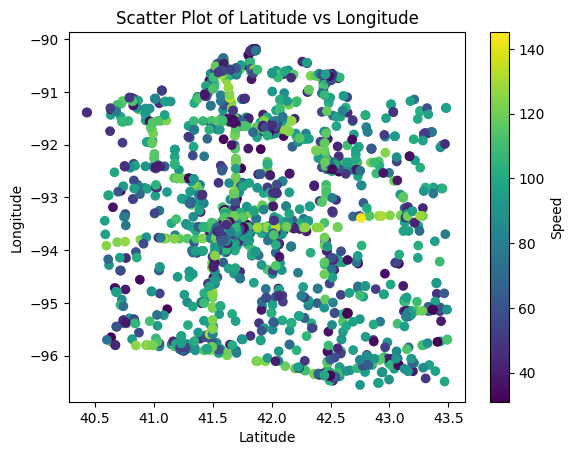

In [11]:
df = rdd_filtered.toDF(["latitude", "longitude", "speed"])
import matplotlib.pyplot as plt


plt.scatter(df.select('latitude').collect(), df.select('longitude').collect(), c=df.select('speed').collect())
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter Plot of Latitude vs Longitude')
plt.colorbar(label='Speed')
plt.show()

Discussion:
1. What is the purpose of RDD transformations and actions?
Transformations create a new RDD from an existing one. They build up a lineage of transformations that will be executed when an action is called.

2. How would you modify the code to filter by different latitude or heading?

rdd_filtered = rdd_extracted.filter(lambda x: x[____fill in the blank____] > ___whatever you want to filter by___)


Activity #2:


In [12]:
csv_file_path2 = '/content/drive/My Drive/apple_stock.csv'
rdd2 = spark.sparkContext.textFile(csv_file_path2)
rdd2.take(20)

['Date,Open,High,Low,Close,Volume,Adj Close',
 '2010-01-04,213.429998,214.499996,212.38000099999996,214.009998,123432400,27.727039',
 '2010-01-05,214.599998,215.589994,213.249994,214.379993,150476200,27.774976000000002',
 '2010-01-06,214.379993,215.23,210.750004,210.969995,138040000,27.333178000000004',
 '2010-01-07,211.75,212.000006,209.050005,210.58,119282800,27.28265',
 '2010-01-08,210.299994,212.000006,209.06000500000002,211.98000499999998,111902700,27.464034',
 '2010-01-11,212.79999700000002,213.000002,208.450005,210.11000299999998,115557400,27.221758',
 '2010-01-12,209.18999499999998,209.76999500000002,206.419998,207.720001,148614900,26.91211',
 '2010-01-13,207.870005,210.92999500000002,204.099998,210.650002,151473000,27.29172',
 '2010-01-14,210.11000299999998,210.45999700000002,209.020004,209.43,108223500,27.133657',
 '2010-01-15,210.92999500000002,211.59999700000003,205.869999,205.93,148516900,26.680197999999997',
 '2010-01-19,208.330002,215.18999900000003,207.240004,215.039995

In [13]:
df = spark.read.csv(csv_file_path2, header=True, inferSchema=True)
df.count()

1762

In [14]:
df.describe().show()

+-------+------------------+------------------+------------------+-----------------+-------------------+------------------+
|summary|              Open|              High|               Low|            Close|             Volume|         Adj Close|
+-------+------------------+------------------+------------------+-----------------+-------------------+------------------+
|  count|              1762|              1762|              1762|             1762|               1762|              1762|
|   mean| 313.0763111589103| 315.9112880164581| 309.8282405079457|312.9270656379113|9.422577587968218E7| 75.00174115607275|
| stddev|185.29946803981522|186.89817686485767|183.38391664371008|185.1471036170943|6.020518776592709E7| 28.57492972179906|
|    min|              90.0|         90.699997|         89.470001|        90.279999|           11475900|         24.881912|
|    max|        702.409988|        705.070023|        699.569977|       702.100021|          470249500|127.96609099999999|
+-------

In [15]:
df.head()

Row(Date=datetime.date(2010, 1, 4), Open=213.429998, High=214.499996, Low=212.38000099999996, Close=214.009998, Volume=123432400, Adj Close=27.727039)

In [16]:
df_selected = df.select('Date', 'Open', 'Close', 'Volume')
df_selected.show()

+----------+------------------+------------------+---------+
|      Date|              Open|             Close|   Volume|
+----------+------------------+------------------+---------+
|2010-01-04|        213.429998|        214.009998|123432400|
|2010-01-05|        214.599998|        214.379993|150476200|
|2010-01-06|        214.379993|        210.969995|138040000|
|2010-01-07|            211.75|            210.58|119282800|
|2010-01-08|        210.299994|211.98000499999998|111902700|
|2010-01-11|212.79999700000002|210.11000299999998|115557400|
|2010-01-12|209.18999499999998|        207.720001|148614900|
|2010-01-13|        207.870005|        210.650002|151473000|
|2010-01-14|210.11000299999998|            209.43|108223500|
|2010-01-15|210.92999500000002|            205.93|148516900|
|2010-01-19|        208.330002|        215.039995|182501900|
|2010-01-20|        214.910006|            211.73|153038200|
|2010-01-21|        212.079994|        208.069996|152038600|
|2010-01-22|206.78000600

In [17]:
from pyspark.sql.functions import col
df = df.withColumn('Daily_Change', col('Close') - col('Open'))
df.show()

+----------+------------------+------------------+------------------+------------------+---------+------------------+--------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|        Daily_Change|
+----------+------------------+------------------+------------------+------------------+---------+------------------+--------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|  0.5799999999999841|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|-0.22000499999998624|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004| -3.4099980000000016|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265| -1.1699999999999875|
|2010-01-08|        210.299

Sorry, I don't understand what is meant by "Calculate the Average Daily Volume". Isn't that already provided?

In [18]:
from pyspark.sql.functions import min, max

df.select(min("Close"), max("Close")).show()

+----------+----------+
|min(Close)|max(Close)|
+----------+----------+
| 90.279999|702.100021|
+----------+----------+



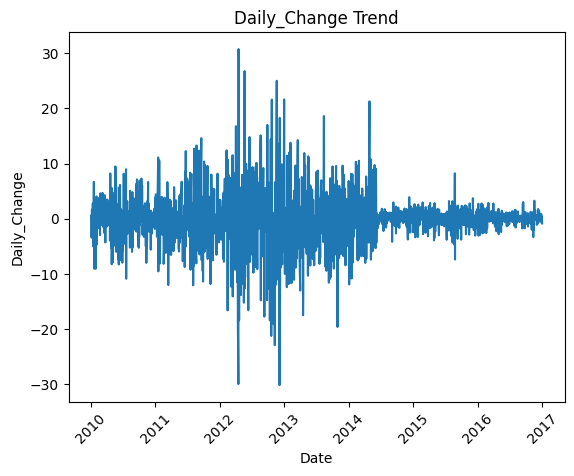

In [19]:
import matplotlib.pyplot as plt
dates = df.select("Date").rdd.flatMap(lambda x: x).collect()
close_prices = df.select("Daily_Change").rdd.flatMap(lambda x: x).collect()

plt.plot(dates, close_prices)
plt.xlabel("Date")
plt.ylabel("Daily_Change")
plt.title("Daily_Change Trend")
plt.xticks(rotation=45)
plt.show()

In [20]:
from pyspark.sql.functions import max

df.select(max("Daily_Change")).show()

+------------------+
| max(Daily_Change)|
+------------------+
|30.760008999999968|
+------------------+



Discussion:
1. How would you modify the code to filter data for specific months or years?

from pyspark.sql.functions import month, year

#Filter for data in January
filtered_df = df.filter(month(df['Date']) == 1)

#Filter for data in the year 2023
filtered_df = df.filter(year(df['Date']) == 2023)

#Filter for data in January 2023
filtered_df = df.filter((month(df['Date']) == 1) & (year(df['Date']) == 2023))


2. Can you identify the highest daily price increase?

from pyspark.sql.functions import max

df.select(max("Daily_Change")).show()

answer: 30.760008999999968

Activity #3:

In [21]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType, DoubleType
import matplotlib.pyplot as plt
import seaborn as sns
import logging


In [22]:
spark = SparkSession.builder.appName("SamGood_Act3").getOrCreate()

In [23]:
csv_file_path3 = '/content/drive/My Drive/ID_31_data.csv'
rdd3 = spark.sparkContext.textFile(csv_file_path3)
rdd3.take(20)

['capturedtimestamp,latitude,longitude,speed,geohash,month,day,hour,ID,Custom_ID_left,index_right,Custom_ID_right,FIRST_ROUT_1,FIRST_ROAD_1,FIRST_MEDI_1,FIRST_AADT_1,FIRST_NUMB_1,MEAN_AADT_1,MEAN_EXPAN_1,MEAN_PERCE_1,MEAN_MEDIA_1,MEAN_SURFA_1,BUFF_DIST_1,ORIG_FID_1,freq,date,Time,date_time1,date_time,time,MAX,MIN,day_of_week,traveltime,Custom_ID,FIRST_ROUT_2,FIRST_ROAD_2,FIRST_MEDI_2,FIRST_AADT_2,FIRST_NUMB_2,MEAN_AADT_2,MEAN_EXPAN_2,MEAN_PERCE_2,MEAN_MEDIA_2,MEAN_SURFA_2,Shape_Leng,BUFF_DIST_2,ORIG_FID_2,Direction,geometry,Leg,Journey_Direction',
 '2022-08-04 06:16:00,42.731673,-93.832972,54.40103105,9zt70g,4e-323,4,6,DSFS_CD7,ID_31,24,ID_31,S001930003E,0,0,2022,2,4163.7037037,0.0,14.037037037,0.0,32.7777777778,50.0,24,220,2022-08-04,06:16:00,2022-08-04 06:16:00,2022-08-04 06:16:00,22560.0,50189.0,22560.0,Thursday,27629.0,ID_31,S001930003E,0,0,2022,2,4163.7037037,0.0,14.037037037,0.0,32.7777777778,0.0795420439583,50.0,52,1,POINT (-93.832972 42.731673),Upstream,Same Direction',
 '2022-

In [24]:
df2 = spark.read.csv(csv_file_path3, header=True, inferSchema=True)
df2.printSchema()

root
 |-- capturedtimestamp: timestamp (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- speed: double (nullable = true)
 |-- geohash: string (nullable = true)
 |-- month: double (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- ID: string (nullable = true)
 |-- Custom_ID_left: string (nullable = true)
 |-- index_right: integer (nullable = true)
 |-- Custom_ID_right: string (nullable = true)
 |-- FIRST_ROUT_1: string (nullable = true)
 |-- FIRST_ROAD_1: integer (nullable = true)
 |-- FIRST_MEDI_1: integer (nullable = true)
 |-- FIRST_AADT_1: integer (nullable = true)
 |-- FIRST_NUMB_1: integer (nullable = true)
 |-- MEAN_AADT_1: double (nullable = true)
 |-- MEAN_EXPAN_1: double (nullable = true)
 |-- MEAN_PERCE_1: double (nullable = true)
 |-- MEAN_MEDIA_1: double (nullable = true)
 |-- MEAN_SURFA_1: double (nullable = true)
 |-- BUFF_DIST_1: double (nullable = true)
 |-- ORIG_FID_1: in

In [25]:
from pyspark.sql.types import IntegerType

df2 = df2.withColumn("ID", df2["ID"].cast(IntegerType()))
df2.printSchema()

root
 |-- capturedtimestamp: timestamp (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- speed: double (nullable = true)
 |-- geohash: string (nullable = true)
 |-- month: double (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Custom_ID_left: string (nullable = true)
 |-- index_right: integer (nullable = true)
 |-- Custom_ID_right: string (nullable = true)
 |-- FIRST_ROUT_1: string (nullable = true)
 |-- FIRST_ROAD_1: integer (nullable = true)
 |-- FIRST_MEDI_1: integer (nullable = true)
 |-- FIRST_AADT_1: integer (nullable = true)
 |-- FIRST_NUMB_1: integer (nullable = true)
 |-- MEAN_AADT_1: double (nullable = true)
 |-- MEAN_EXPAN_1: double (nullable = true)
 |-- MEAN_PERCE_1: double (nullable = true)
 |-- MEAN_MEDIA_1: double (nullable = true)
 |-- MEAN_SURFA_1: double (nullable = true)
 |-- BUFF_DIST_1: double (nullable = true)
 |-- ORIG_FID_1: i

In [27]:
from pyspark.sql.functions import to_timestamp

df2 = df2.withColumn("Time26", to_timestamp("Time26"))

The column "hour" and "day" have the hour and day of the week, I'm not understanding what you mean by extract them.

For the 5/10/20 over, I am assuming a speed limit of 50.

In [28]:
from pyspark.sql.functions import col, sum, when

df2 = df2.withColumn("over_55", when(col("speed") > 55, 1).otherwise(0))
df2 = df2.withColumn("over_60", when(col("speed") > 60, 1).otherwise(0))
df2 = df2.withColumn("over_70", when(col("speed") > 70, 1).otherwise(0))

fraction_over_55 = df2.select(sum("over_55") / df2.count()).collect()[0][0]
fraction_over_60 = df2.select(sum("over_60") / df2.count()).collect()[0][0]
fraction_over_70 = df2.select(sum("over_70") / df2.count()).collect()[0][0]

print(f"Fraction 5 over limit 50: {fraction_over_55}")
print(f"Fraction 10 over limit 50: {fraction_over_60}")
print(f"Fraction 20 over limit 50: {fraction_over_70}")

Fraction 5 over limit 50: 0.5706776180698152
Fraction 10 over limit 50: 0.26625990026400703
Fraction 20 over limit 50: 0.0


In [30]:
import logging

logging.basicConfig(level=logging.INFO)
logging.info(f"Fraction 5 over limit 50: {fraction_over_55}")
logging.info(f"Fraction 10 over limit 50: {fraction_over_60}")
logging.info(f"Fraction 20 over limit 50: {fraction_over_70}")

In [31]:
from pyspark.sql.functions import col, median

median_over_55 = df2.filter(col("speed") > 55).select(median("speed")).collect()[0][0]
median_over_60 = df2.filter(col("speed") > 60).select(median("speed")).collect()[0][0]
median_over_70 = df2.filter(col("speed") > 70).select(median("speed")).collect()[0][0]

print(f"Median speed over 55: {median_over_55}")
print(f"Median speed over 60: {median_over_60}")
print(f"Median speed over 70: {median_over_70}")

Median speed over 55: 59.40928131
Median speed over 60: 61.55922497
Median speed over 70: None


In [32]:
from pyspark.sql.functions import col
df2_selected = df2.select("speed", "hour", "day")
pandas_df = df2_selected.toPandas()

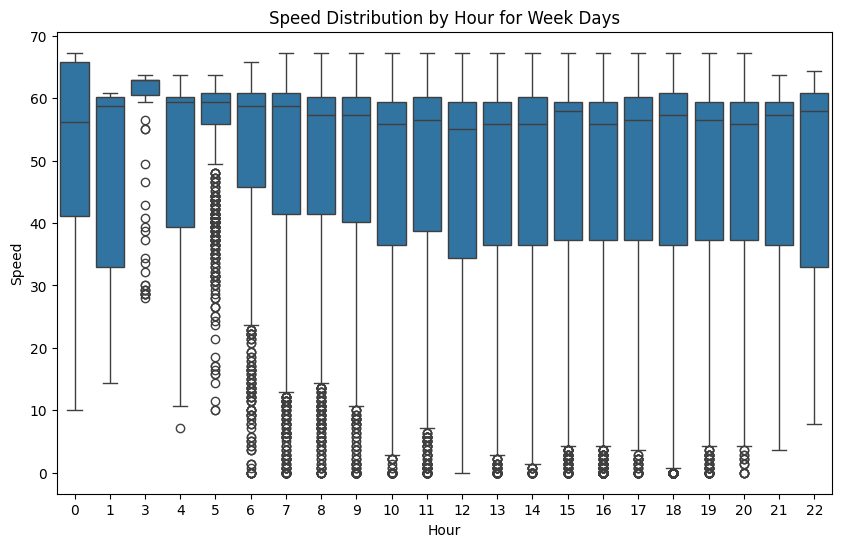

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = pandas_df[(pandas_df['day'] >= 1) & (pandas_df['day'] <= 5)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='speed', data=filtered_df)
plt.title('Speed Distribution by Hour for Week Days')
plt.xlabel('Hour')
plt.ylabel('Speed')
plt.show()

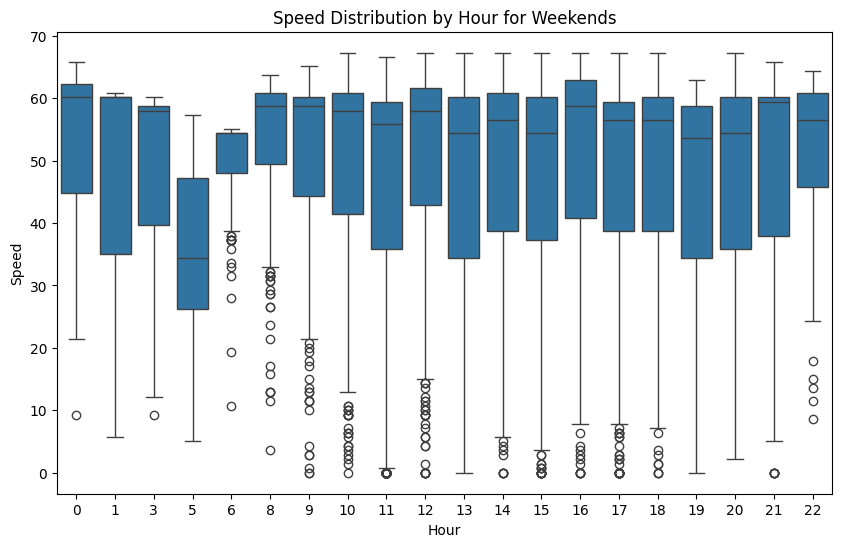

In [34]:
filtered_df = pandas_df[(pandas_df['day'] == 6) | (pandas_df['day'] == 7)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='speed', data=filtered_df)
plt.title('Speed Distribution by Hour for Weekends')
plt.xlabel('Hour')
plt.ylabel('Speed')
plt.show()